In [91]:
import numpy as np
import pandas as pd
import pytz
from datetime import datetime, timedelta
from pandas.tseries.offsets import Hour, Minute, Second
from pandas.tseries.offsets import Day, MonthEnd
import matplotlib.pyplot as plt

### Basic date manipulations in Python

Python supports a datetime module which has several functionalitites:
1. Datetime objects representing a specific date in time with years, months and days
2. Addition and substraction of datetime objects
3. Format datetime objects based on different format specification

Pandas supports handling of null value timestampts with its NaT which stands for Not a Time.

In [2]:
current_date = datetime.now()
current_date

datetime.datetime(2023, 10, 9, 23, 8, 9, 724391)

In [3]:
current_date.year, current_date.month, current_date.day

(2023, 10, 9)

In [4]:
delta = datetime(2019, 1, 7) - datetime(2003, 10, 2, 8, 15)
delta

datetime.timedelta(days=5575, seconds=56700)

In [5]:
delta = delta + timedelta(10)
delta

datetime.timedelta(days=5585, seconds=56700)

In [6]:
stamp = datetime(2011,1,3)
print(str(stamp))

2011-01-03 00:00:00


In [7]:
stamp = stamp.strftime("%D")
stamp

'01/03/11'

In [8]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
dates_arr = ["2015-03-18", "1996-07-03", None]
datetime_index = pd.to_datetime(dates_arr)
datetime_index

DatetimeIndex(['2015-03-18', '1996-07-03', 'NaT'], dtype='datetime64[ns]', freq=None)

### Time Series in Pandas

Times series are essentially an a Pandas series with its index set to the timestamps. 

Timestamps show the specific value of something in that time. For now we will just fill the values with random ones

In [10]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index = dates)
ts

2011-01-02    1.188353
2011-01-05    0.708290
2011-01-07   -0.055270
2011-01-08   -0.332874
2011-01-10   -1.070696
2011-01-12   -0.803902
dtype: float64

In [11]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

The same things for regular Pandas series apply here, operations are broadcast and we can also select a value by using the date as an index in our timeseries.

In [12]:
ts = ts*2
ts

2011-01-02    2.376705
2011-01-05    1.416579
2011-01-07   -0.110539
2011-01-08   -0.665747
2011-01-10   -2.141392
2011-01-12   -1.607804
dtype: float64

In [13]:
ts["2011-01-12"]

-1.6078038369459673

Something more interesting is when we are manipulating a big timeseries. We will use ```pd.date_range``` for the creation of our timeseries. Let's demonstrate selecting months and slicing.

In [14]:
longer_ts = pd.Series(np.random.standard_normal(1000),index = pd.date_range("2000-01-01", periods = 1000))


In [15]:
longer_ts["2001-03-04" : "2002-03-04"]

2001-03-04   -0.562484
2001-03-05    1.426742
2001-03-06    1.190147
2001-03-07   -0.245448
2001-03-08   -3.178409
                ...   
2002-02-28    1.745655
2002-03-01    0.259269
2002-03-02   -1.521790
2002-03-03    0.443297
2002-03-04    0.650932
Freq: D, Length: 366, dtype: float64

In [16]:
longer_ts[datetime(2000,3,4): datetime(2002,1,1)]

2000-03-04    1.085103
2000-03-05   -0.431077
2000-03-06   -0.815011
2000-03-07   -0.021413
2000-03-08    0.575687
                ...   
2001-12-28    0.100170
2001-12-29    0.098292
2001-12-30   -0.878774
2001-12-31    1.412670
2002-01-01   -0.329882
Freq: D, Length: 669, dtype: float64

We can also slice with timestamps that are not present in our timeseries.

In [17]:
ts

2011-01-02    2.376705
2011-01-05    1.416579
2011-01-07   -0.110539
2011-01-08   -0.665747
2011-01-10   -2.141392
2011-01-12   -1.607804
dtype: float64

In [18]:
ts["2011-01-06":"2011-01-11"]

2011-01-07   -0.110539
2011-01-08   -0.665747
2011-01-10   -2.141392
dtype: float64

In [19]:
ts.truncate(after = "2011-01-04") #truncate based on the date provided, here we select everything after the provided date

2011-01-02    2.376705
dtype: float64

In [20]:
dates = pd.date_range("2000-01-01", periods = 100, freq = "W-WED")
df_towns = pd.DataFrame(np.random.standard_normal((100,4)), index = dates, columns = ["Tokyo", "Montreal", "Madrid", "London"])
df_towns

,Tokyo,Montreal,Madrid,London
2000-01-05,1.305381,-0.425701,0.139724,-0.050027
2000-01-12,2.269944,-0.405261,3.511892,2.180556
2000-01-19,1.298355,-1.085938,-0.932520,0.752929
2000-01-26,-0.676409,0.707007,0.975453,0.529796
2000-02-02,-0.125726,0.848431,-0.843737,-0.108116
...,...,...,...,...
2001-10-31,-1.894543,0.134203,-1.738118,0.759894
2001-11-07,0.197882,0.430427,-2.301897,0.391602
2001-11-14,0.556712,0.337815,-0.229206,0.512061
2001-11-21,-0.154951,-0.016419,-0.058824,-0.001022


In [21]:
df_towns.loc["2001-10-31"]

Tokyo      -1.894543
Montreal    0.134203
Madrid     -1.738118
London      0.759894
Name: 2001-10-31 00:00:00, dtype: float64

### Working with duplicates

In [22]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02","2000-01-02", "2000-01-03"])
duplicates = pd.Series(data = [1,2,3,3,4], index = dates)
duplicates

2000-01-01    1
2000-01-02    2
2000-01-02    3
2000-01-02    3
2000-01-03    4
dtype: int64

In [23]:
duplicates["2000-01-02"]

2000-01-02    2
2000-01-02    3
2000-01-02    3
dtype: int64

In [24]:
duplicates.groupby(level = 0).mean()

2000-01-01    1.000000
2000-01-02    2.666667
2000-01-03    4.000000
dtype: float64

### Working with frequencies
When working with time series, we have many options for frequencies. For example once a week, every hour or different frequencies. Pandas has a ```resample``` method for this purpose.

In [25]:
ts

2011-01-02    2.376705
2011-01-05    1.416579
2011-01-07   -0.110539
2011-01-08   -0.665747
2011-01-10   -2.141392
2011-01-12   -1.607804
dtype: float64

In [26]:
ts = ts.resample("D") #parameter indicates how to resample
ts

```pd.date_range``` can be used to generate large sequences of data starting or ending on a particular date. Also these periods can be a specific number of days or other.

In [27]:
dates = pd.date_range("2016-12-12", "2017-12-12")
dates

DatetimeIndex(['2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15',
               '2016-12-16', '2016-12-17', '2016-12-18', '2016-12-19',
               '2016-12-20', '2016-12-21',
               ...
               '2017-12-03', '2017-12-04', '2017-12-05', '2017-12-06',
               '2017-12-07', '2017-12-08', '2017-12-09', '2017-12-10',
               '2017-12-11', '2017-12-12'],
              dtype='datetime64[ns]', length=366, freq='D')

In [28]:
date_quarterly = pd.date_range("2016-12-01", "2017-12-12", freq = "Q-JAN")
date_quarterly

DatetimeIndex(['2017-01-31', '2017-04-30', '2017-07-31', '2017-10-31'], dtype='datetime64[ns]', freq='Q-JAN')

In [29]:
date_20days = pd.date_range("2018-01-03 08:46:21", periods = 20, normalize = True)
date_20days

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
               '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-13', '2018-01-14',
               '2018-01-15', '2018-01-16', '2018-01-17', '2018-01-18',
               '2018-01-19', '2018-01-20', '2018-01-21', '2018-01-22'],
              dtype='datetime64[ns]', freq='D')

In [30]:
hour = Hour()
minute = Minute()
second = Second()
fifteen_seconds = Second(15)
high_freq = pd.date_range("2023-01-01", "2023-01-01 23:59",freq = fifteen_seconds)
high_freq

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:00:15',
               '2023-01-01 00:00:30', '2023-01-01 00:00:45',
               '2023-01-01 00:01:00', '2023-01-01 00:01:15',
               '2023-01-01 00:01:30', '2023-01-01 00:01:45',
               '2023-01-01 00:02:00', '2023-01-01 00:02:15',
               ...
               '2023-01-01 23:56:45', '2023-01-01 23:57:00',
               '2023-01-01 23:57:15', '2023-01-01 23:57:30',
               '2023-01-01 23:57:45', '2023-01-01 23:58:00',
               '2023-01-01 23:58:15', '2023-01-01 23:58:30',
               '2023-01-01 23:58:45', '2023-01-01 23:59:00'],
              dtype='datetime64[ns]', length=5757, freq='15S')

In [31]:
print("Shifting provides us with a way to move data backwards or forwards in time.")

Shifting provides us with a way to move data backwards or forwards in time.


In [32]:
shifting_example = pd.date_range("2015-01-01", "2015-01-05")
shifting_example

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [33]:
shifting_example.shift(5)

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10'],
              dtype='datetime64[ns]', freq='D')

In [34]:
shifting_example.shift(-5)

DatetimeIndex(['2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31'],
              dtype='datetime64[ns]', freq='D')

In [35]:
series_shifting = pd.Series([1,2,3,4,5], index = shifting_example)
series_shifting

2015-01-01    1
2015-01-02    2
2015-01-03    3
2015-01-04    4
2015-01-05    5
Freq: D, dtype: int64

An interesting trick is to compute how much percentage wise has a timeseries valu changed, based on a shift.

In [36]:
percentage = (series_shifting / series_shifting.shift(1) - 1) * 100
percentage

2015-01-01           NaN
2015-01-02    100.000000
2015-01-03     50.000000
2015-01-04     33.333333
2015-01-05     25.000000
Freq: D, dtype: float64

Roll forward "rolls" a date to the end of the specific month.

Roll backward "rolls" a date to the end of the previous month.

In [37]:
offset = MonthEnd()
now = datetime(2015,10,5)
now

datetime.datetime(2015, 10, 5, 0, 0)

In [38]:
offset.rollforward(now)

Timestamp('2015-10-31 00:00:00')

In [39]:
offset.rollback(now)

Timestamp('2015-09-30 00:00:00')

Timezones can be tricky in real life, let's see how pandas handles them.

In [40]:
pytz.common_timezones[-10:]

['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [41]:
dates = pd.date_range("2018-01-01", periods = 5)
ts = pd.Series(data = np.random.standard_normal(5), index = dates)
ts

2018-01-01   -0.584078
2018-01-02    0.606397
2018-01-03   -0.314697
2018-01-04    0.184517
2018-01-05   -2.563211
Freq: D, dtype: float64

In [42]:
print(ts.index.tz)

None


In [43]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2018-01-01 00:00:00+00:00   -0.584078
2018-01-02 00:00:00+00:00    0.606397
2018-01-03 00:00:00+00:00   -0.314697
2018-01-04 00:00:00+00:00    0.184517
2018-01-05 00:00:00+00:00   -2.563211
Freq: D, dtype: float64

In [44]:
ts_utc.tz_convert("Pacific/Wake")

2018-01-01 12:00:00+12:00   -0.584078
2018-01-02 12:00:00+12:00    0.606397
2018-01-03 12:00:00+12:00   -0.314697
2018-01-04 12:00:00+12:00    0.184517
2018-01-05 12:00:00+12:00   -2.563211
Freq: D, dtype: float64

In [45]:
period = pd.Period("2016", freq = "A-DEC")
period

Period('2016', 'A-DEC')

In [46]:
period + 5

Period('2021', 'A-DEC')

In [47]:
periods = pd.period_range("2001-06-17", "2003-09-12", freq = "M")
periods

PeriodIndex(['2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11',
             '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05',
             '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11',
             '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05',
             '2003-06', '2003-07', '2003-08', '2003-09'],
            dtype='period[M]')

In [48]:
periods.asfreq("Y", how = "start")

PeriodIndex(['2001', '2001', '2001', '2001', '2001', '2001', '2001', '2002',
             '2002', '2002', '2002', '2002', '2002', '2002', '2002', '2002',
             '2002', '2002', '2002', '2003', '2003', '2003', '2003', '2003',
             '2003', '2003', '2003', '2003'],
            dtype='period[A-DEC]')

In [49]:
dates = pd.date_range("2000-01-01", periods=100)

ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [50]:
ts

2000-01-01    2.806497
2000-01-02   -0.131241
2000-01-03    2.379334
2000-01-04    0.714154
2000-01-05    0.558446
                ...   
2000-04-05    0.634097
2000-04-06   -1.126666
2000-04-07   -1.194704
2000-04-08   -2.167976
2000-04-09    1.817400
Freq: D, Length: 100, dtype: float64

In [51]:
resampled = ts.resample("M").mean()
resampled

2000-01-31    0.273954
2000-02-29   -0.165873
2000-03-31    0.202297
2000-04-30    0.248875
Freq: M, dtype: float64

In [52]:
seconds = pd.date_range("2013-01-01", periods = 300, freq = "S")
ts_seconds = pd.Series(np.random.standard_normal(len(seconds)), index = seconds)
ts_seconds

2013-01-01 00:00:00    1.336579
2013-01-01 00:00:01   -0.110805
2013-01-01 00:00:02   -0.879296
2013-01-01 00:00:03   -1.107567
2013-01-01 00:00:04   -1.302838
                         ...   
2013-01-01 00:04:55    0.263817
2013-01-01 00:04:56    0.288730
2013-01-01 00:04:57    0.949430
2013-01-01 00:04:58    0.253776
2013-01-01 00:04:59   -0.844119
Freq: S, Length: 300, dtype: float64

In [53]:
ts_seconds.resample("1min").sum()

2013-01-01 00:00:00    -6.035484
2013-01-01 00:01:00    -6.500239
2013-01-01 00:02:00    -3.529949
2013-01-01 00:03:00   -16.525871
2013-01-01 00:04:00    -0.926684
Freq: T, dtype: float64

In [54]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index = dates)
ts.resample("D").ohlc()

,open,high,low,close
2000-01-01,60,60,60,60
2000-01-02,88,88,88,88
2000-01-03,94,94,94,94
2000-01-04,64,64,64,64
2000-01-05,0,0,0,0
...,...,...,...,...
2000-04-05,52,52,52,52
2000-04-06,12,12,12,12
2000-04-07,81,81,81,81
2000-04-08,86,86,86,86


Sometimes we want to convert to a higher frequency, but without agggregation.

In [55]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                        index=pd.date_range("2000-01-01", periods=2,freq="W-WED"),
                        columns=["Colorado", "Texas", "New York", "Ohio"])

frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.871815,1.354279,-0.365203,-0.356152
2000-01-12,-0.808983,-0.222305,1.143481,0.244324


In [56]:
frame.resample("D").asfreq()

,Colorado,Texas,New York,Ohio
2000-01-05,0.871815,1.354279,-0.365203,-0.356152
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.808983,-0.222305,1.143481,0.244324


Now we have to deal with filling the missing information.

In [57]:
frame.resample("D").ffill(limit = 3)

,Colorado,Texas,New York,Ohio
2000-01-05,0.871815,1.354279,-0.365203,-0.356152
2000-01-06,0.871815,1.354279,-0.365203,-0.356152
2000-01-07,0.871815,1.354279,-0.365203,-0.356152
2000-01-08,0.871815,1.354279,-0.365203,-0.356152
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.808983,-0.222305,1.143481,0.244324


We can have multiple time series in one dataframe

In [58]:
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=7)
df = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], 7),
                     "value": np.arange(7 * 3.)})
df

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0
7,2017-05-20 00:02:00,b,7.0
8,2017-05-20 00:02:00,c,8.0
9,2017-05-20 00:03:00,a,9.0


Let's use a Grouper object, to group the time series by the key column.

In [59]:
time_key = pd.Grouper(freq="5min")

In [61]:
resampled = (df.set_index("time").groupby(["key", time_key]).sum())

In [64]:
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,33.0
2,b,2017-05-20 00:00:00,35.0
3,b,2017-05-20 00:05:00,35.0
4,c,2017-05-20 00:00:00,40.0
5,c,2017-05-20 00:05:00,37.0


### Moving window functions

Different types of statistics and functions are evaluated over a period of time. This period of time is called a window. 

With the movement of the period comes the term moving window.

In [69]:
dataset = pd.read_csv("data/MARUTI.csv")

In [79]:
dataset = dataset.set_index(pd.to_datetime(dataset["Date"]))
dataset.drop_duplicates(inplace = True)
b_day_dataset = dataset.resample("B").ffill()

The rolling operator creates a window from the specified days and help us smooth out the curve.

Rolling functions require all of the values in the window to be non-NA.

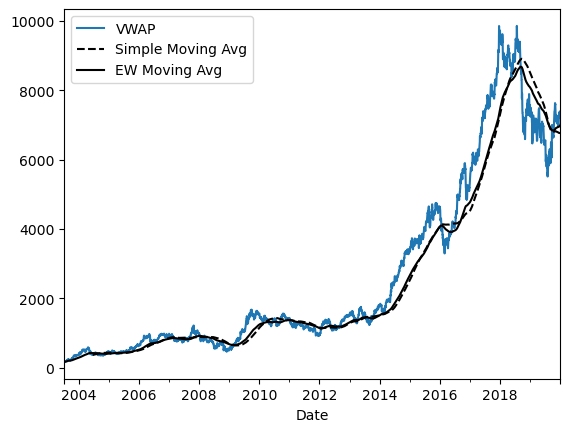

In [98]:
b_day_dataset["VWAP"].plot()
rolling = b_day_dataset["VWAP"].rolling(250).mean()
ewm_rolling = b_day_dataset["VWAP"].ewm(span = 250).mean()

rolling.plot(style="k--", label="Simple Moving Avg")
ewm_rolling.plot(style="k-", label = "EW Moving Avg")
plt.legend()
plt.show()